<a href="https://colab.research.google.com/github/subashini092/NLP/blob/main/27_01_2025_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load your dataframe, for example:
df = pd.read_csv('tripadvisor_hotel_reviews.csv')  # Assuming your CSV file is named 'tripadvisor_hotel_reviews.csv'

features = df.columns.tolist()[2:]
df = df.drop(features, axis=1)
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [ ]:
import re
from nltk.corpus import stopwords

def clean(review):
    review = review.lower()
    # This line was incorrect, apply lower to the regex pattern if needed or remove it entirely
    # review = re.sub.lower()
    review = re.sub('[^a-z A-Z 0-9]+', '', review)
    # Corrected sploit() to split()
    review = " ".join([word for word in review.split() if word not in stopwords.words('english')])
    return review

In [ ]:
df['Review'] = df['Review'].apply(clean)
df.head()

,Review,Rating,Review_lists
0,nice hotel expensive parking got good deal sta...,4,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,2,"[ok, nothing, special, charge, diamond, member..."
2,nice rooms 4 experience hotel monaco seattle g...,3,"[nice, rooms, not, 4*, experience, hotel, mona..."
3,unique great stay wonderful time hotel monaco ...,5,"[unique,, great, stay,, wonderful, time, hotel..."
4,great stay great stay went seahawk game awesom...,5,"[great, stay, great, stay,, went, seahawk, gam..."


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def corpus(text):
    text_list = text.split()
    return text_list

In [ ]:
def corpus(text):
    text_list = text.split()
    return text_list

df['Review_lists'] = df['Review'].apply(corpus)
df.head()

,Review,Rating,Review_lists
0,nice hotel expensive parking got good deal sta...,4,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,2,"[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4* experience hotel monaco seat...,3,"[nice, rooms, not, 4*, experience, hotel, mona..."
3,"unique, great stay, wonderful time hotel monac...",5,"[unique,, great, stay,, wonderful, time, hotel..."
4,"great stay great stay, went seahawk game aweso...",5,"[great, stay, great, stay,, went, seahawk, gam..."


In [ ]:
from tqdm import trange
corpus = []
for i in trange(df.shape[0], ncols=50, nrows=10, colour='green', smoothing=0.8): # Changed 'colours' to 'colour'
  corpus += df['Review_lists'][i]
len(corpus)

100%|███| 20491/20491 [00:00<00:00, 110745.21it/s]


2138765

In [ ]:
from collections import Counter # Changed 'collection' to 'collections'
mostCommon = Counter(corpus).most_common(10)
mostCommon

[('hotel', 42079),
 ('not', 30750),
 ('room', 30532),
 ('great', 18732),
 ("n't", 18436),
 ('staff', 14950),
 ('good', 14791),
 ('did', 13433),
 ('just', 12458),
 ('stay', 11376)]

In [ ]:
words = []
freq = []
for word, count in mostCommon:
  words.append(word)
  freq.append(count)

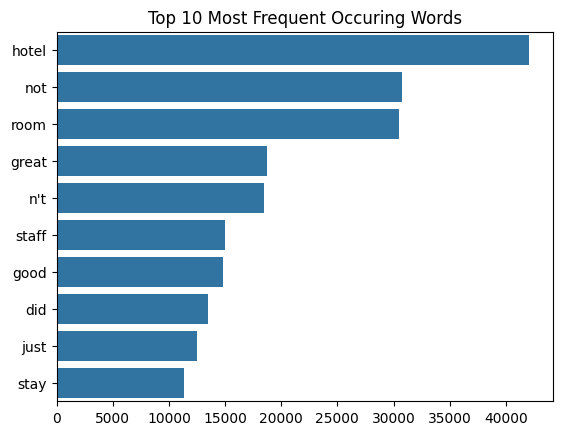

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt # Import the matplotlib.pyplot module

sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequent Occuring Words')
plt.show()

In [ ]:
# In cell 19, replace 'print(vector)' with either:

# 1. If you meant to print the 'words' list:
print(words)

# 2. If you meant to print the 'freq' list:
print(freq)

# 3. If 'vector' should represent something else, define it first:
vector = [] # Or any other appropriate initialization
# ... your code to populate the vector ...
print(vector)

['hotel', 'not', 'room', 'great', "n't", 'staff', 'good', 'did', 'just', 'stay']
[42079, 30750, 30532, 18732, 18436, 14950, 14791, 13433, 12458, 11376]
[]


## TEXT SIMILARITY

In [ ]:
doc_trump = "Mr. Trump became the president after winning the political election.\nThough he lost the support of some republican friends, Trump is friends with President Putin"

doc_election = "President Trump says Putin had no political interference in the election outcome.\nHe says it was a witchhunt by political parties.\nHe claimed President Putin is a friend who had nothing to do with the election"

doc_putin = "Post elections, Vladimir Putin became President.\nPresident Putin had served as the Prime Minister earlier in his political career"

documents = [doc_trump, doc_election, doc_putin]


In [ ]:
documents

['Mr. Trump became the president after winning the political election.\nThough he lost the support of some republican friends, Trump is friends with President Putin',
 'President Trump says Putin had no political interference in the election outcome.\nHe says it was a witchhunt by political parties.\nHe claimed President Putin is a friend who had nothing to do with the election',
 'Post elections, Vladimir Putin became President.\nPresident Putin had served as the Prime Minister earlier in his political career']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

count_vect = CountVectorizer(stop_words='english')
sparse_matrix = count_vect.fit_transform(documents)

doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix,
                  columns=count_vect.get_feature_names_out(), # Changed get_feature_names() to get_feature_names_out()
                  index=['doc_trump', 'doc_election', 'doc_putin'])
df

,career,claimed,earlier,election,elections,friend,friends,interference,lost,minister,mr,outcome,parties,political,post,president,prime,putin,republican,says,served,support,trump,vladimir,winning,witchhunt
doc_trump,0,0,0,1,0,0,2,0,1,0,1,0,0,1,0,2,0,1,1,0,0,1,2,0,1,0
doc_election,0,1,0,2,0,1,0,1,0,0,0,1,1,2,0,2,0,2,0,2,0,0,1,0,0,1
doc_putin,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1,2,1,2,0,0,1,0,0,1,0,0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(df, df))

[[1.         0.51639778 0.3796283 ]
 [0.51639778 1.         0.46676003]
 [0.3796283  0.46676003 1.        ]]


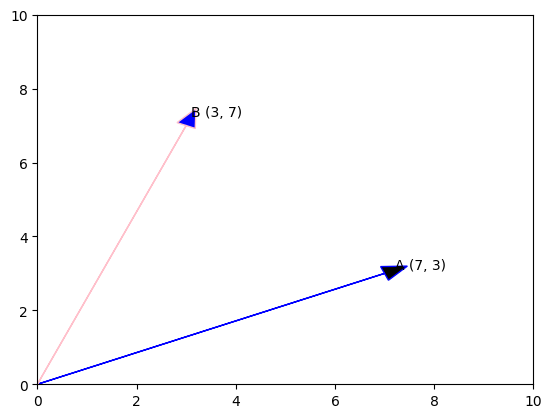

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([7, 3])
B = np.array([3, 7])

ax = plt.axes()

ax.arrow(0.0, 0.0, A[0], A[1], head_width=0.4, head_length=0.5, fc='black', ec='blue')
plt.annotate(f"A ({A[0]}, {A[1]})", xy=(A[0], A[1]), xytext=(A[0] + 0.5, A[1]), textcoords='offset points')

ax.arrow(0.0, 0.0, B[0], B[1], head_width=0.4, head_length=0.5, fc='blue', ec='pink')
plt.annotate(f"B ({B[0]}, {B[1]})", xy=(B[0], B[1]), xytext=(B[0] + 0.5, B[1]), textcoords='offset points')

plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()


# JACARD SIMILARITY

In [ ]:
A = {1,2,3,4,6}
B = {1,2,5,8,9}
C = A.intersection(B)
D = A.union(B)
print('AnB = ', C)
print('AuB = ', D)
print('J(A,B) =,FLOAT(LEN(C))/LEN(D)')


AnB =  {1, 2}
AuB =  {1, 2, 3, 4, 5, 6, 8, 9}
J(A,B) =,FLOAT(LEN(C))/LEN(D)


In [ ]:
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

set_a = {"Language", "for", "Computer", "NLP", "Science"}
set_b = {"NLP", "for", "Language", "Data", 'ML', "AI"}

similarity = jaccard_similarity(set_a, set_b)
print(f"Jaccard Similarity: {similarity}")

Jaccard Similarity: 0.375


30-01-2025

In [ ]:
import nltk

# Download 'punkt' explicitly
nltk.download('punkt')

# Check if 'punkt' is available
nltk.data.find('tokenizers/punkt')

# Define the raw text data
raw = "This is an example sentence. This is another one."

# Tokenize sentences and words
sent_tokens = nltk.sent_tokenize(raw)
word_tokens = nltk.word_tokenize(raw)

# Print the tokens
print("Sentence Tokens:", sent_tokens)
print("Word Tokens:", word_tokens)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
import nltk
import string # Import the string module

lemmer = nltk.stem.WordNetLemmatizer()
def Lemtokens(tokens):
  return [lemmer.lemmatize(token) for token in tokens]

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
def LemNormalize(text):
  return Lemtokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))
def LemNormalize(text):
  return Lemtokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

# Keyword matching

In [ ]:
import random

GREETING_INPUTS = {"hello", "hi", "greetings", "what's up", "hey", "how are you?"}
GREETING_RESPONSES = ["hi", "hey", "*nods*", "hi there", "hello", "I am glad! You are talking to me"]

def greeting(sentence):
    sentence = sentence.lower()  # Convert to lowercase for case-insensitive matching
    if sentence in GREETING_INPUTS:  # Check if the whole sentence is a direct greeting
        return random.choice(GREETING_RESPONSES)
    for word in sentence.split():  # Check individual words for greetings
        if word in GREETING_INPUTS:
            return random.choice(GREETING_RESPONSES)
    return None  # Return None if no greeting is found


In [ ]:
def response(user_response):
  robo_response=''
  sent_tokens.append(user_response)
  TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
  tfidf = TfidfVec.fit_transform(sent_tokens)
  vals = cosine_similarity(tfidf[-1], tfidf)
  idx = vals.argsort()[0][-2]
  flat = vals.flatten()
  flat.sort()
  req_tfidf = flat[-2]
  if(req_tfidf == 0):
    robo_response = robo_response + "I am sorry! I don't understand you"
    return robo_response
  else:
    robo_response = robo_response + sent_tokens[idx]
    return robo_response

In [ ]:
flag = True
print("SABot: My name is SABot. How can I assist you?. \
If you want to exit, type Bye!")
while(flag==True) :
  user_response = input()
  user_response = user_response.lower()
  if(user_response != 'bye'):
    if(user_response == 'thanks' or user_response == 'thank you'):
      flag = False
      print("SABot: You are welcome...")
    else:
      if(greeting(user_response) != None):
        print("SABot: " + greeting(user_response))
      else:
        print("SABot: ", end="")
        print(response(user_response))
        sent_tokens.remove(user_response)
  else:
    flag = False
    print("SABot: Bye! take care...")

SABot: My name is SABot. How can I assist you?. If you want to exit, type Bye!
what is your name
SABot: 

NameError: name 'sent_tokens' is not defined